# Iris Flower Classication


## Import Libraries

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline


## Import Dataset

In [2]:
iris = pd.read_csv('IRIS.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Initial Exploration
Before running any algorithms, let's first try to understand the dataset a bit.

First, let's check out the variables, and see if there's any correlation with each other.

In [7]:
iris[["sepal_length","sepal_width","petal_length","petal_width"]].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


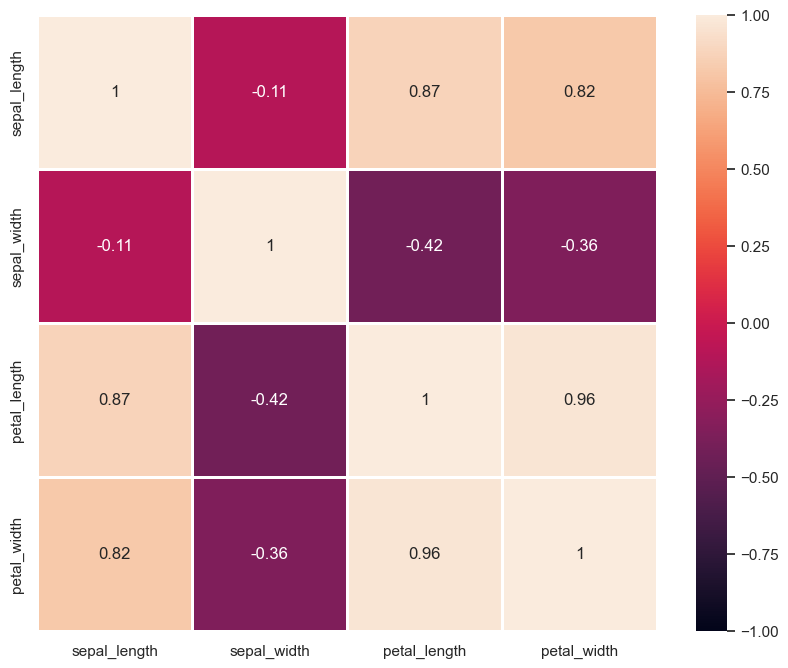

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(iris[["sepal_length","sepal_width","petal_length","petal_width"]].corr(), vmin=-1.0, vmax=1.0, annot=True, linewidths=2)
plt.show()

We can see that there's a really strong positive correlation between petal length and petal width, a strong positive correlation between sepal length and petal length, and a strong positive correlation between sepal length and petal width. If there's a huge dataset with large amount of features, we can run a dimensionality reduction algorithm to take out the redundant features, but because this is such a small dataset, we can keep all the features.

Now let's take a look at the distribution of each variables with respect to each type of Iris.

In [9]:
iris.groupby('species').describe()

sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width                                                \
                      count   mean       std  min    25%  50%    75%  max   
species                                                                     
Iris-setosa            50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4   
Iris-versicolor        50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
Iris-virginica         50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

                petal_length                                               \
                       count   mean       std  min  25%   50%    75%  max   
species                                                                     
Iris-setosa             50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9   
Iris-versicolor         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
Iris-virginica          50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

                petal_width                                            
                      count   mean       std  min  25%  50%  75%  max  
species                                                                
Iris-setosa            50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor        50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica         50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

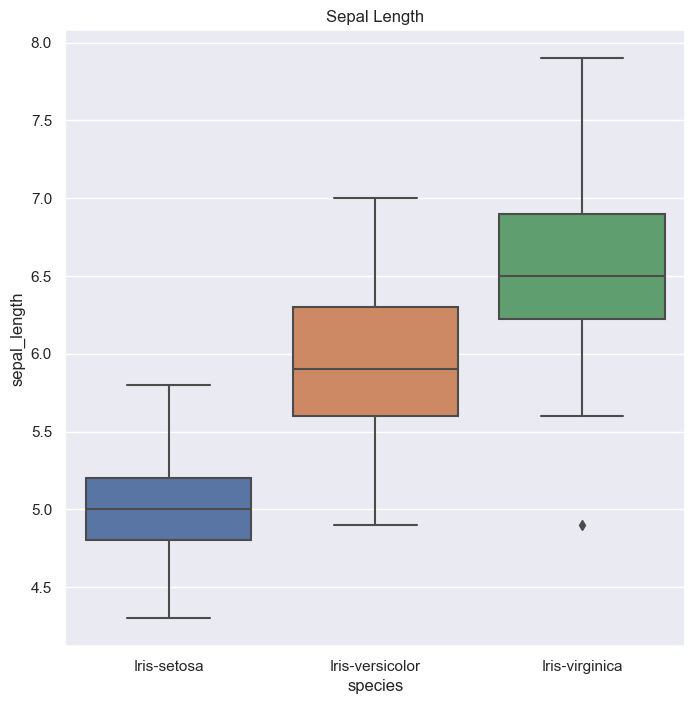

In [10]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="species", y="sepal_length", data=iris).set_title('Sepal Length')
plt.show()

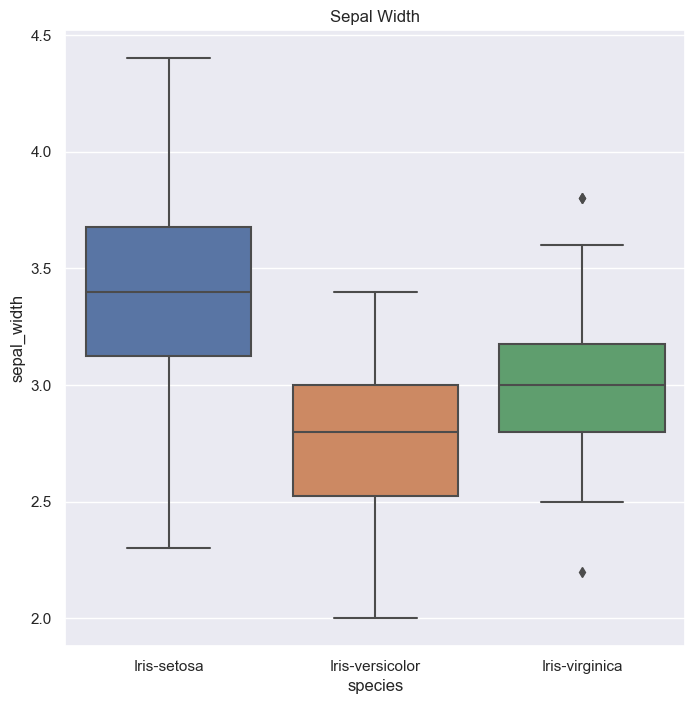

In [11]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="species", y="sepal_width", data=iris).set_title('Sepal Width')
plt.show()

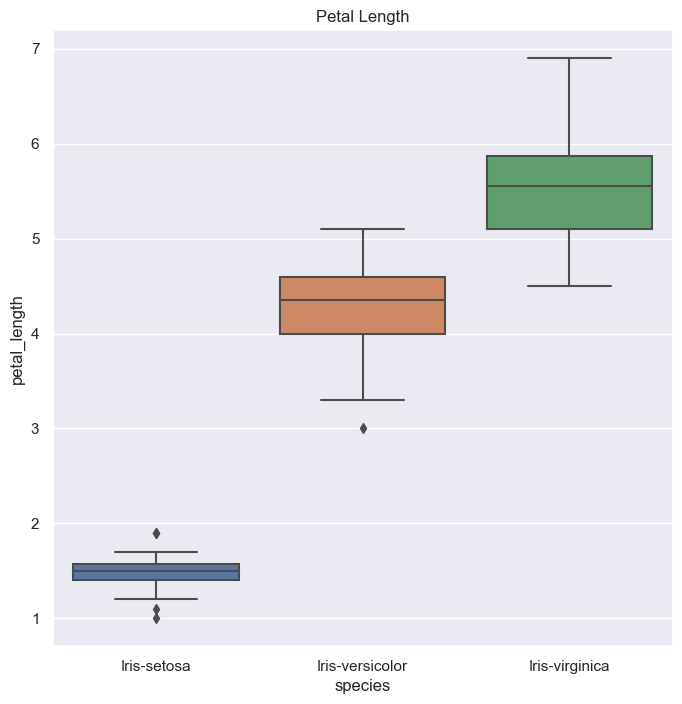

In [12]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="species", y="petal_length", data=iris).set_title('Petal Length')
plt.show()

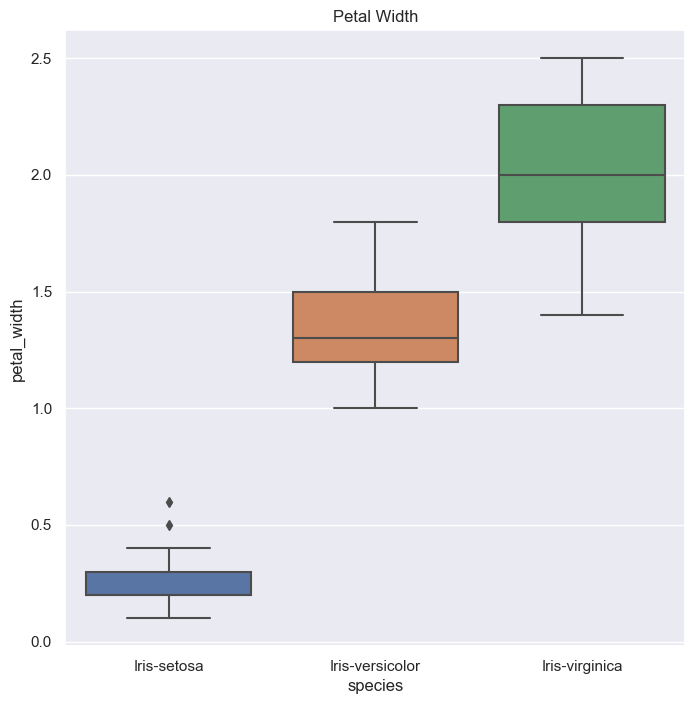

In [13]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="species", y="petal_width", data=iris).set_title('Petal Width')
plt.show()

From the four graphs above, we can see that there's a large difference in distribution of data especially for sepal length, petal length, petal width, not so much for sepal width. Decision tree seems like a sensible algorithm to model the problem.

## Modeling


We start with separating the dataset into training, validation, and test set.

In [25]:
# We take 80% of data into training, and 20% into test
# We take 80% of data into training, and 20% into test
from sklearn.model_selection import train_test_split
X=iris[["sepal_length","sepal_width","petal_length","petal_width"]]

iris["species"].replace(['Iris-setosa', 'Iris-virginica',"Iris-versicolor"],
                        [0, 1,2], inplace=True)
y=iris["species"]
training_X ,test_X,training_y,test_y  = train_test_split( X, y, test_size=0.33, random_state=42)


In [26]:
print('Training set:', training_X.shape)
print('Test set:', test_X.shape)

Training set: (100, 4)
Test set: (50, 4)


We will run a couple classification algorithms on the dataset and see how well they work.
* Logistic Regression
* Decision Tree
* K Nearest Neighbor(KNN)
* Support Vector Machine

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=200).fit(training_X, training_y)
print('Training accuracy:', LR_classifier.score(training_X, training_y))
print('Test accuracy:', LR_classifier.score(test_X, test_y))

Training accuracy: 0.96
Test accuracy: 1.0


### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dTree_classifier = DecisionTreeClassifier(criterion="entropy").fit(training_X, training_y)
print('Training accuracy:', dTree_classifier.score(training_X, training_y))
print('Test accuracy:', dTree_classifier.score(test_X, test_y))

Training accuracy: 1.0
Test accuracy: 0.98


### K Nearest Neighbor(KNN)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier().fit(training_X, training_y)
print('Training accuracy:', KNN_classifier.score(training_X, training_y))
print('Test accuracy:', KNN_classifier.score(test_X, test_y))

Training accuracy: 0.96
Test accuracy: 0.98


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

### Support Vector Machine

In [30]:
from sklearn.svm import LinearSVC
SVC_classifier = LinearSVC(multi_class='crammer_singer', max_iter=3000).fit(training_X, training_y)
SVC_classifier.score(training_X, training_y)
print('Training accuracy:', SVC_classifier.score(training_X, training_y))
print('Test accuracy:', SVC_classifier.score(test_X, test_y))

Training accuracy: 0.97
Test accuracy: 0.96


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


All four algorithms performs perfectly on the test set, achieving 100% accuracy. We can now use the algorithms to predict the type of Iris when we have new measurements.

At last, let's visualize the decision tree.

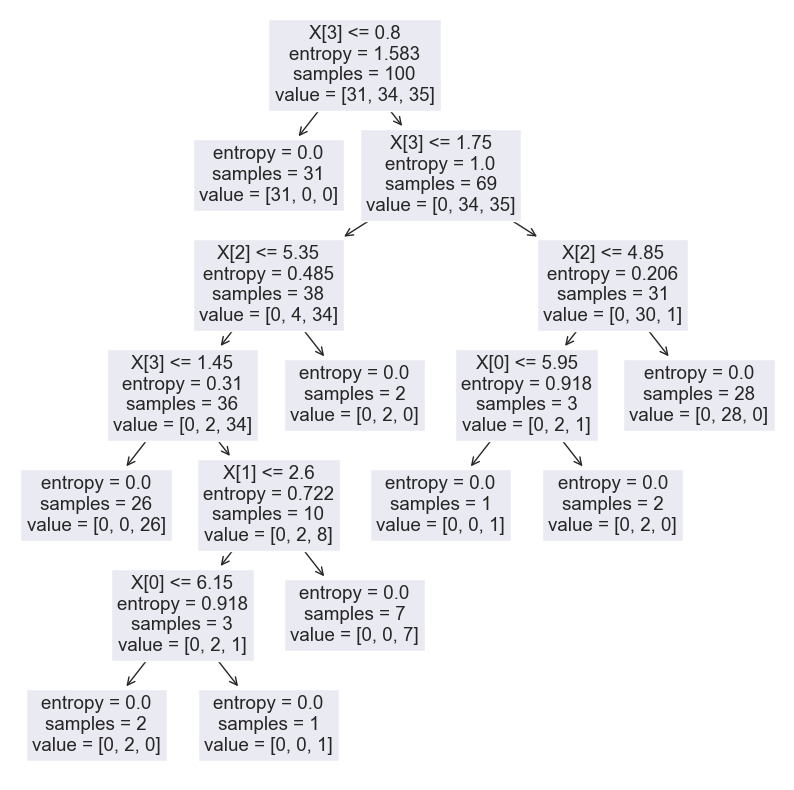

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dTree_classifier)
plt.show()